**Name** : Poonam Raosaheb Wagh

**Roll No** : B1951020

**PRN** : 72018648L

**Class** : BE IT A

# Importing Libraries

In [29]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [30]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

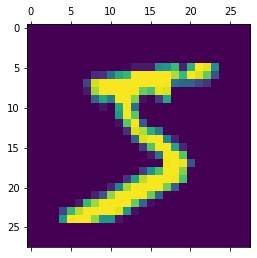

In [31]:
#to see how first image looks
plt.matshow(x_train[0])

In [32]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #flatten 2d to 1d
    keras.layers.Dense(128,activation = 'relu'), # hidden layer
    keras.layers.Dense(10,activation = 'softmax') # output layer
])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [35]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [36]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6580 - accuracy: 0.8351 - val_loss: 0.3512 - val_accuracy: 0.9053
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3324 - accuracy: 0.9083 - val_loss: 0.2858 - val_accuracy: 0.9219
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2826 - accuracy: 0.9209 - val_loss: 0.2537 - val_accuracy: 0.9300
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2521 - accuracy: 0.9290 - val_loss: 0.2326 - val_accuracy: 0.9354
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2294 - accuracy: 0.9355 - val_loss: 0.2147 - val_accuracy: 0.9401
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2116 - accuracy: 0.9404 - val_loss: 0.1997 - val_accuracy: 0.9433
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1963 - accuracy: 0.9447 - val_loss: 0.1861 - val_accuracy:

# Evaluate the Model

In [37]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1586 - accuracy: 0.9539
Loss = 0.159
Accuracy = 0.954


# Making Prediction on New Data

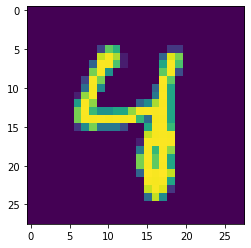

In [38]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [39]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 967    0    1    1    0    3    5    2    1    0]
 [   0 1115    2    2    1    1    3    2    9    0]
 [   8    4  984    7    6    0    4    8   10    1]
 [   0    1   11  965    0    7    0   10   10    6]
 [   1    1    3    1  938    0    8    3    5   22]
 [   8    2    1   22    2  831    8    1   10    7]
 [  14    3    2    0    8   14  913    1    3    0]
 [   2    8   21    4    3    1    0  973    1   15]
 [   3    3    5   17    8    6    7    7  913    5]
 [   9    6    1   16   20    5    1    7    4  940]], shape=(10, 10), dtype=int32)
